## Sunita Inderjit
### CS675 – Introduction to Data Science (CRN: 74028) Fall 2023
### Project1 Customer Churn

#### About this project

**This goal of this project is to perform Exploratory Data Analysis(EDA) on  Tele Customer Churn data, to investigate -the data, uncover valuable insights such customer churn rate, correlation among various features and features -importance**

**The Following step was taken for this analysis

1. Import the necessary libraries
2. Read in the data
3. Data Preparation 
4. Identity Dta Types
5. Split data into 80/20
6. Identitfy Limitation and issues



## Data Preparation

1. Load data
2. view dataframe
3. check for missing values - no missing values
4. look for outlier
5. Ensure all entries are numeric for modeling
6. Handle categorical and text data appropriately

In [105]:
# Import the necessary Libararies

import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [106]:
# Read in the data file customer churn

data = pd.read_csv("telco-customer-churn.csv")
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [107]:
# check shape of data
data.shape


(7043, 21)

In [108]:
# get name of all columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [109]:
# exploring data, review data type and missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
# statistical overview of data
data.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

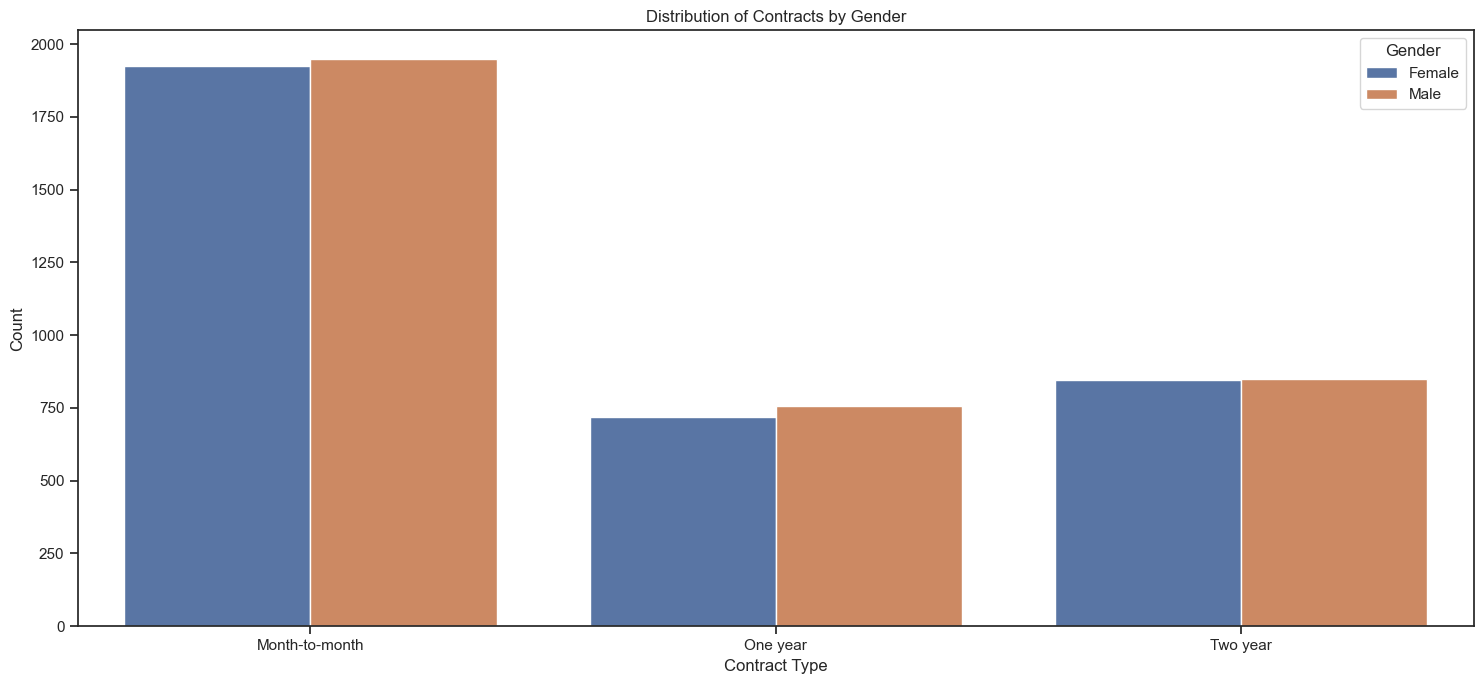

In [131]:
# visualizing  the distribution between gender and contract
plt.figure(figsize=(15, 7))
sns.countplot(data=data, x='Contract', hue='gender')

# Title and labels
plt.title('Distribution of Contracts by Gender')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


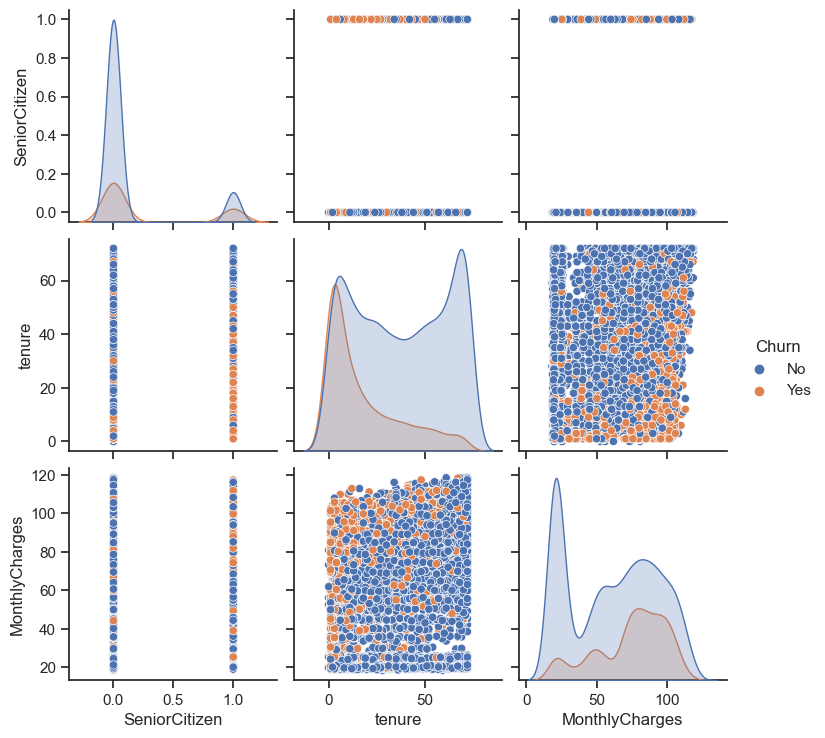

In [112]:
# visulaizing churn 
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data, hue="Churn")

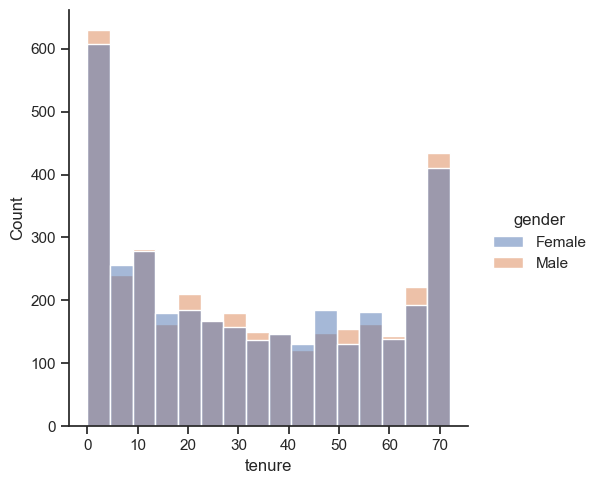

In [113]:
# Displayed tensure by itself
sns.displot(data, x="tenure", hue='gender')


In [114]:
#checking for missing values
# no missing values

missing_values = data.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Performing Data cleaning

1. Encoding Categorical colums  into numerical format (0,1)
2. TotalCharges converted to NaN and replace with median value
3. dropped  Customer ID
4. No outlier

**Clean dataset has 31 columns all in numerical format and 7043 entires**

In [115]:
# 1. Encoding Categorical Columns
data_encoded = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 
                                             'MultipleLines', 'InternetService', 'OnlineSecurity',
                                             'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                             'StreamingTV', 'StreamingMovies', 'Contract', 
                                             'PaperlessBilling', 'PaymentMethod', 'Churn'],
                              drop_first=True)

data_encoded


customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges  \
0     7590-VHVEG              0       1           29.85        29.85   
1     5575-GNVDE              0      34           56.95       1889.5   
2     3668-QPYBK              0       2           53.85       108.15   
3     7795-CFOCW              0      45           42.30      1840.75   
4     9237-HQITU              0       2           70.70       151.65   
...          ...            ...     ...             ...          ...   
7038  6840-RESVB              0      24           84.80       1990.5   
7039  2234-XADUH              0      72          103.20       7362.9   
7040  4801-JZAZL              0      11           29.60       346.45   
7041  8361-LTMKD              1       4           74.40        306.6   
7042  3186-AJIEK              0      66          105.65       6844.5   

      gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0               0            1               0                 0   
1               1            0               0                 1   
2               1            0               0                 1   
3               1            0               0                 0   
4               0            0               0                 1   
...           ...          ...             ...               ...   
7038            1            1               1                 1   
7039            0            1               1                 1   
7040            0            1               1                 0   
7041            1            1               0                 1   
7042            1            0               0                 1   

      MultipleLines_No phone service  ...  StreamingTV_Yes  \
0                                  1  ...                0   
1                                  0  ...                0   
2                                  0  ...                0   
3                                  1  ...                0   
4                                  0  ...                0   
...                              ...  ...              ...   
7038                               0  ...                1   
7039                               0  ...                1   
7040                               1  ...                0   
7041                               0  ...                0   
7042                               0  ...                1   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                       0                    0   
1                                       0                    0   
2                                       0                    0   
3                                       0                    0   
4                                       0                    0   
...                                   ...                  ...   
7038                                    0                    1   
7039                                    0                    1   
7040                                    0                    0   
7041                                    0                    0   
7042                                    0                    1   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                     0                  0                     1   
1                     1                  0                     0   
2                     0                  0                     1   
3                     1                  0                     0   
4                     0                  0                     1   
...                 ...                ...                   ...   
7038                  1                  0                     1   
7039                  1                  0                     1   
7040                  0                  0                     1   
7041                  0                  0                     1   
7042                  0               

In [116]:
# 1. Encoding Categorical Columns
non_numeric_total_charges = pd.to_numeric(data['TotalCharges'], errors='coerce').isna().sum()
non_numeric_total_charges

11

In [117]:
# Converting 'TotalCharges' to numeric, placing NaN where conversion is not possible
data_encoded['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [118]:
# Handling NaN values in 'TotalCharges'
# Here,replace NaN with the median value of 'TotalCharges'
median_total_charges = data_encoded['TotalCharges'].median()
data_encoded['TotalCharges'].fillna(median_total_charges, inplace=True)



In [119]:
# 3. Dropping 'CustomerID' not useful for prediction
data_encoded = data_encoded.drop(['customerID'], axis=1)


In [120]:
#Outlier Detection
# check for outliers in numerical columns: 'tenure', 'MonthlyCharges', and 'TotalCharges'
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
outliers = {col: {} for col in numerical_columns}


In [121]:
# Identifying outliers using IQR ( interquartile range)method
# create a for loop (loop over numeric col)
for col in numerical_columns:
    Q1 = data_encoded[col].quantile(0.25) # cal the .25 quartiles
    Q3 = data_encoded[col].quantile(0.75) # cal the .75 quartiles
    IQR = Q3 - Q1 # difference between 3rd and 1st percentile
    lower_bound = Q1 - 1.5 * IQR # definding the outlier bounds
    upper_bound = Q3 + 1.5 * IQR
    outliers[col]['lower_bound'] = lower_bound # storing the bound in the outlier dictrionary
    outliers[col]['upper_bound'] = upper_bound
    # counting the number of outliers
    outliers[col]['outliers'] = data_encoded[(data_encoded[col] < lower_bound) | (data_encoded[col] > upper_bound)].shape[0]

# Verifying data after cleaning
data_encoded_info = data_encoded.info()
data_encoded_head = data_encoded.head()
data_encoded_describe = data_encoded.describe()

(non_numeric_total_charges, outliers, data_encoded_info, data_encoded_head, data_encoded_describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

(11,
 {'tenure': {'lower_bound': -60.0, 'upper_bound': 124.0, 'outliers': 0},
  'MonthlyCharges': {'lower_bound': -46.02499999999999,
   'upper_bound': 171.375,
   'outliers': 0},
  'TotalCharges': {'lower_bound': -4674.3375,
   'upper_bound': 8863.1625,
   'outliers': 0}},
 None,
    SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
 0              0       1           29.85         29.85            0   
 1              0      34           56.95       1889.50            1   
 2              0       2           53.85        108.15            1   
 3              0      45           42.30       1840.75            1   
 4              0       2           70.70        151.65            0   
 
    Partner_Yes  Dependents_Yes  PhoneService_Yes  \
 0            1               0                 0   
 1            0               0                 1   
 2            0               0                 1   
 3            0               0                 0   
 4            0    

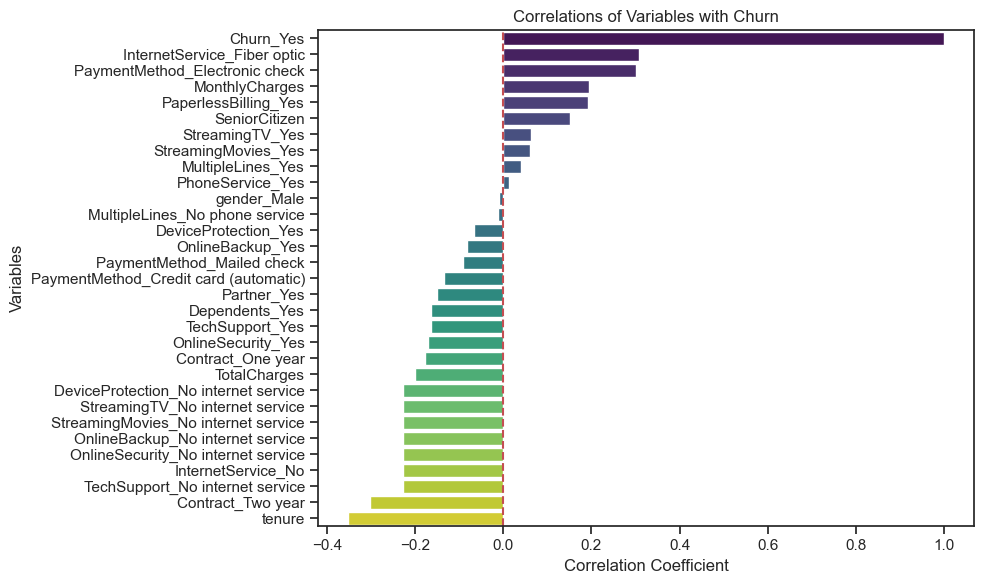

In [122]:
# Calculating correlations with respect to 'Churn_Yes'
correlations = data_encoded.corr()['Churn_Yes'].sort_values(ascending=False)

# Visualizing Correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlations of Variables with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

**Correlations**

**variable positively correclated with churn inclues**

1. InternetServices_fiber Optic
2. PaymentMethod_Electronic check
3. MonthlyCharges

**Variable with negative correlation with churn**

1. contract_two_year
2. no internet services

Text(0, 0.5, 'Frequency')

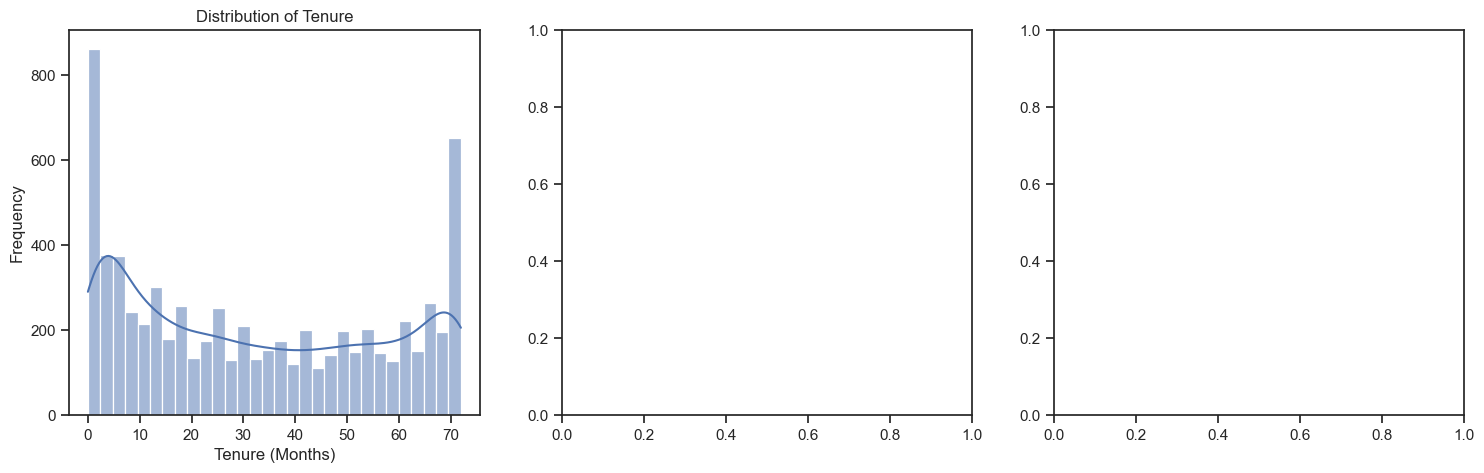

In [123]:
# Visualizing the distribution of 'tenure', 'MonthlyCharges', and 'TotalCharges'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data_encoded['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Frequency')

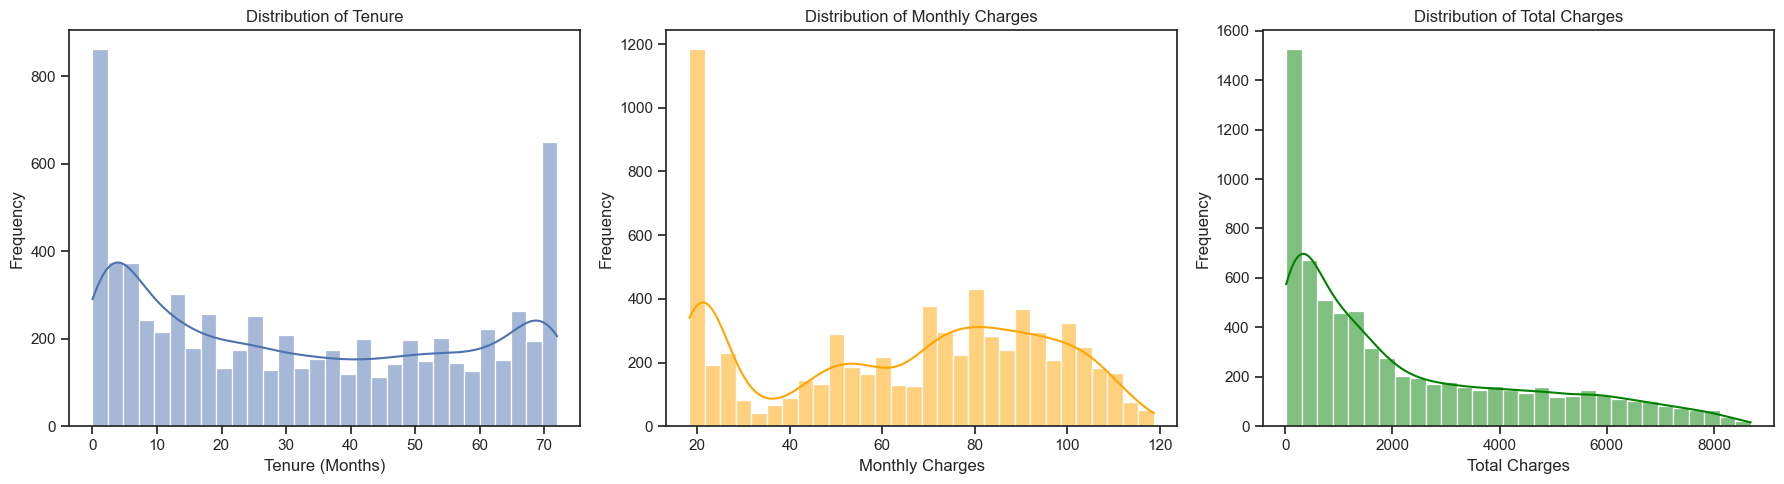

In [124]:
# Visualizing the distribution of 'tenure', 'MonthlyCharges', and 'TotalCharges'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data_encoded['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Tenure')
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Frequency')

sns.histplot(data_encoded['MonthlyCharges'], bins=30, ax=axes[1], kde=True, color='orange')
axes[1].set_title('Distribution of Monthly Charges')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Frequency')

sns.histplot(data_encoded['TotalCharges'], bins=30, ax=axes[2], kde=True, color='green')
axes[2].set_title('Distribution of Total Charges')
axes[2].set_xlabel('Total Charges')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Distribution**

1. Substantail number of customer has short term tenure 


**Monthly Charges**
- monthly - customer group ( some with higer cost and other lowe cost)

**Total Charge**
- right-skewed indicating the most cutomer has lower total charges, possible due to lowee tenure or lower monhtly payment

**Imbalance churn rate**
-  No Churn (0) 76%
- churn(1) 26.54%

In [125]:
# Checking imbalance in 'Churn'
churn_balance = data_encoded['Churn_Yes'].value_counts(normalize=True)

(correlations, churn_balance)

(Churn_Yes                                1.000000
 InternetService_Fiber optic              0.308020
 PaymentMethod_Electronic check           0.301919
 MonthlyCharges                           0.193356
 PaperlessBilling_Yes                     0.191825
 SeniorCitizen                            0.150889
 StreamingTV_Yes                          0.063228
 StreamingMovies_Yes                      0.061382
 MultipleLines_Yes                        0.040102
 PhoneService_Yes                         0.011942
 gender_Male                             -0.008612
 MultipleLines_No phone service          -0.011942
 DeviceProtection_Yes                    -0.066160
 OnlineBackup_Yes                        -0.082255
 PaymentMethod_Mailed check              -0.091683
 PaymentMethod_Credit card (automatic)   -0.134302
 Partner_Yes                             -0.150448
 Dependents_Yes                          -0.164221
 TechSupport_Yes                         -0.164674
 OnlineSecurity_Yes            

## Splitting the Data

- split data into 80/20 ratio
- Training and Testing
- set target to Churn ( 1 = yes and 0 = no)

In [126]:

from sklearn.model_selection import train_test_split

# Defining predictors and target
X = data_encoded.drop("Churn_Yes", axis=1)
y = data_encoded["Churn_Yes"]

# Splitting data into training and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verifying the splits
(train_size, test_size) = (X_train.shape[0], X_test.shape[0])

# Checking balance in training and test sets
churn_balance_train = y_train.value_counts(normalize=True)
churn_balance_test = y_test.value_counts(normalize=True)

(train_size, test_size, churn_balance_train, churn_balance_test)

# Training set: 5634 entries - no churn(o) 73.46%, churn(1) 26.54%
# Testing set: 1409 entries - no churn(0) 73.46%, churn(1) 26.54%



(5634,
 1409,
 0    0.734647
 1    0.265353
 Name: Churn_Yes, dtype: float64,
 0    0.734564
 1    0.265436
 Name: Churn_Yes, dtype: float64)

## Identify Limitation/issues



#### Correlated Predictor Variables
Some predictor variables might be highly correlated with each other, especially after one-hot encoding categorical variables. This multicollinearity can sometimes affect linear models and might need to be addressed during modeling.

#### Outliers and Skewness
Although no extreme outliers were found during the IQR check, the distributions of variables like 'TotalCharges' are skewed. Transformations or robust scaling methods might be needed to handle this.


#### Feature Relevance
While we have many features post-encoding, not all might be relevant for modeling. Feature selection or dimensionality reduction might be beneficial to simplify the model and potentially improve performance.

## EDA with Sweetviz

In [66]:
import sweetviz as sv

In [67]:
report = sv.analyze(data)
report.show_html('sweetviz_report.html')


                                             |      | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



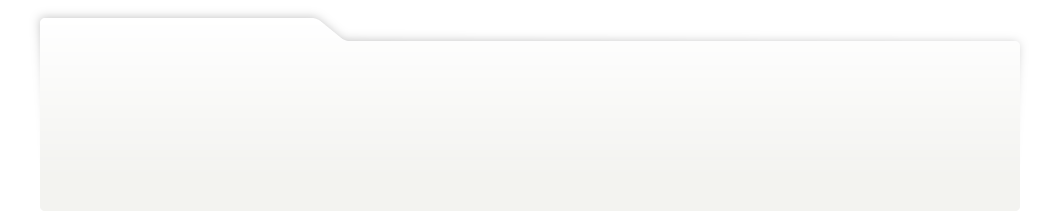
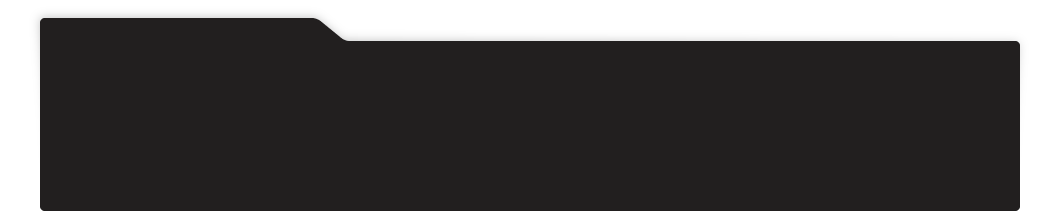
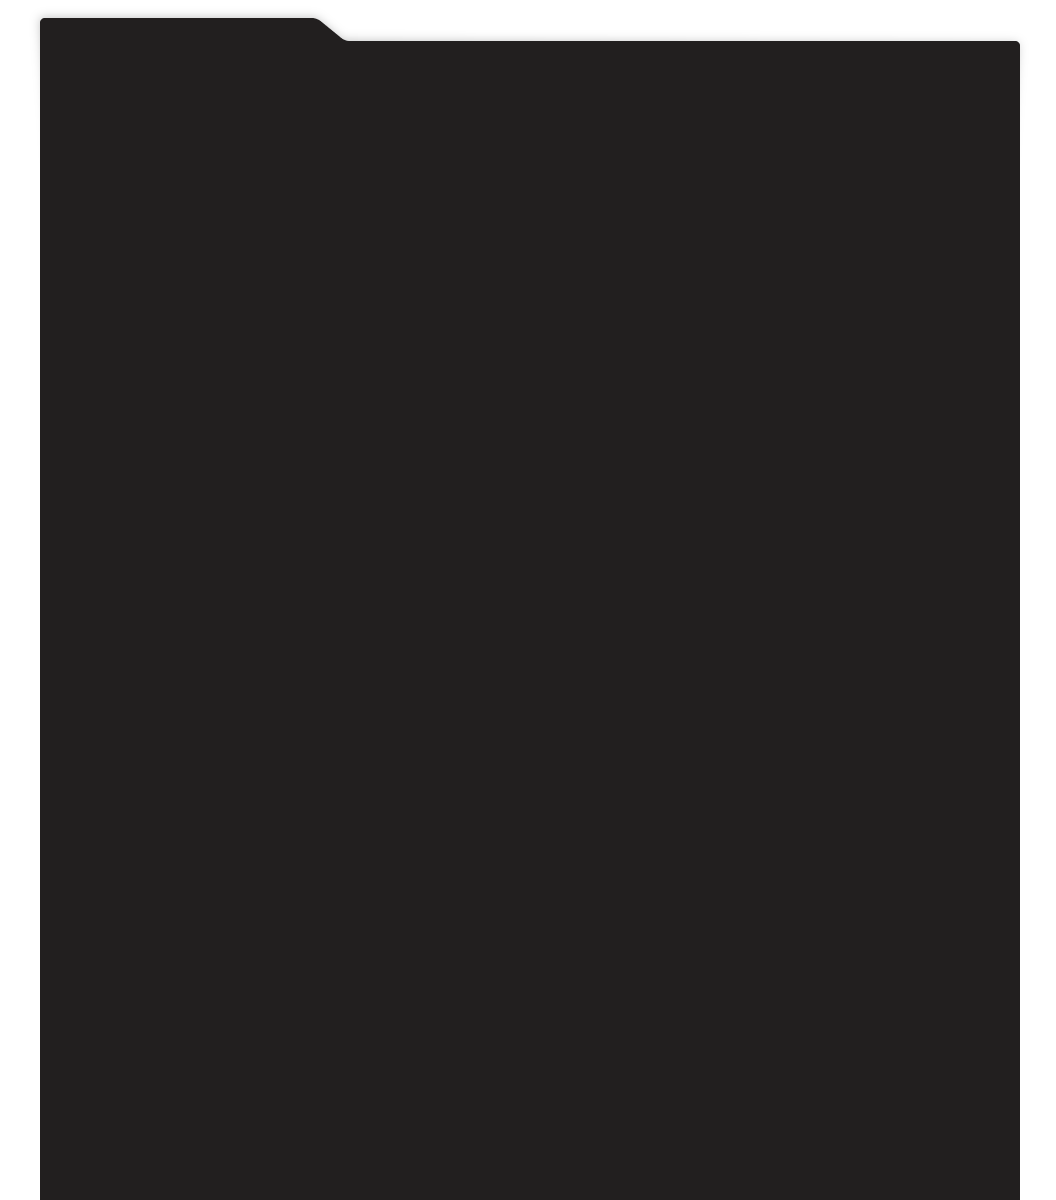
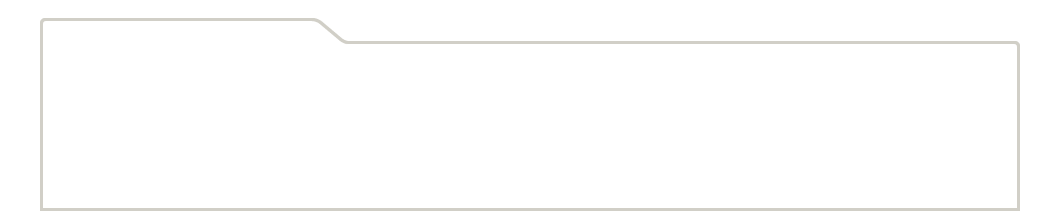
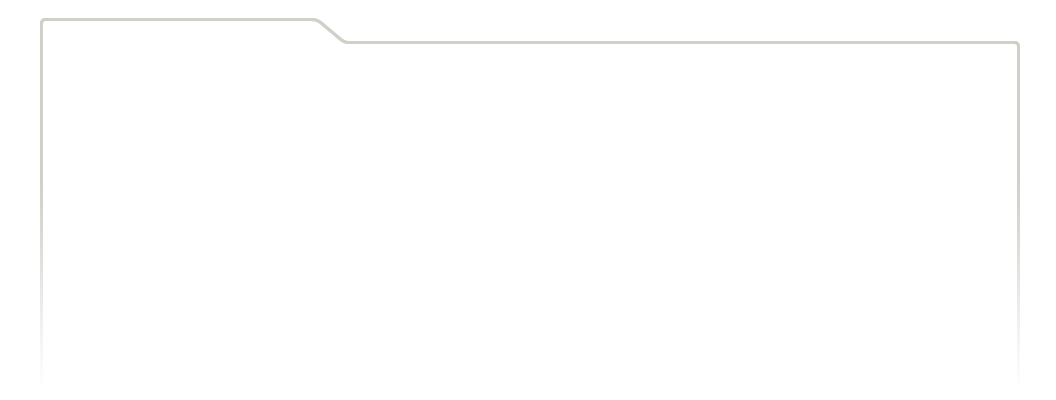
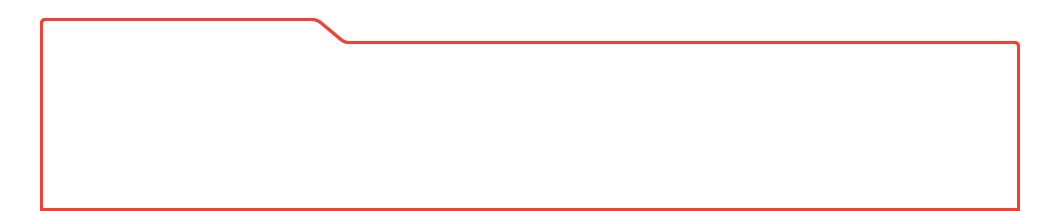
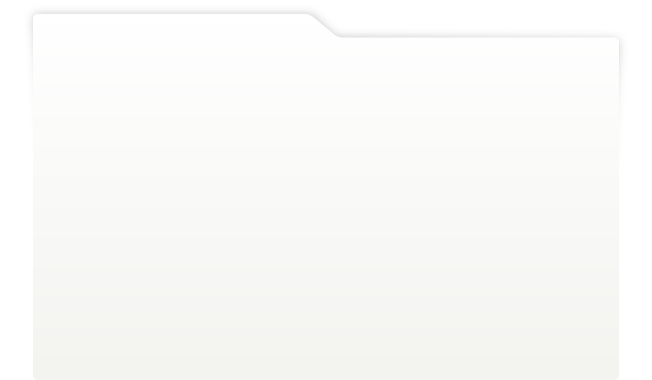
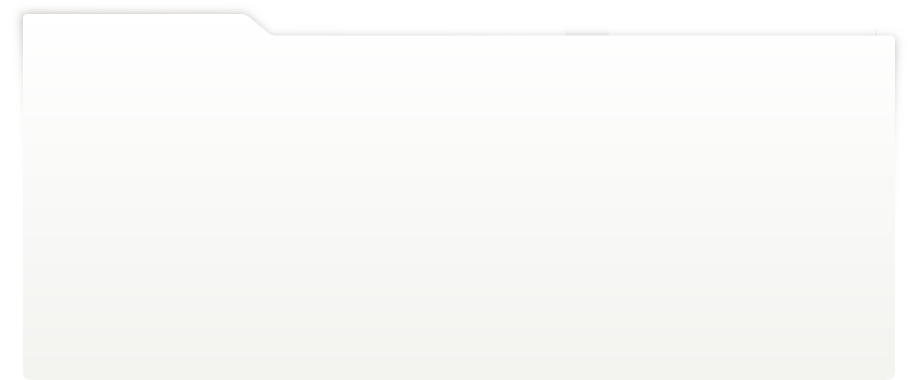
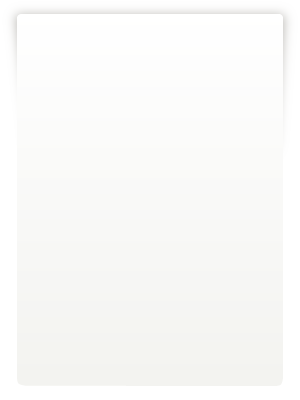
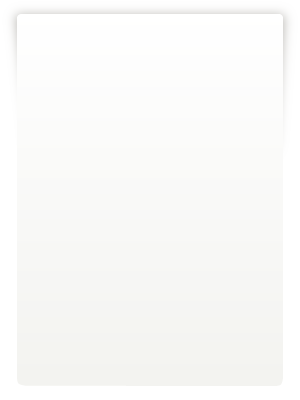
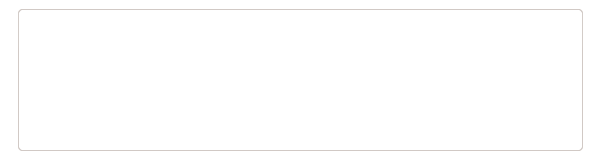
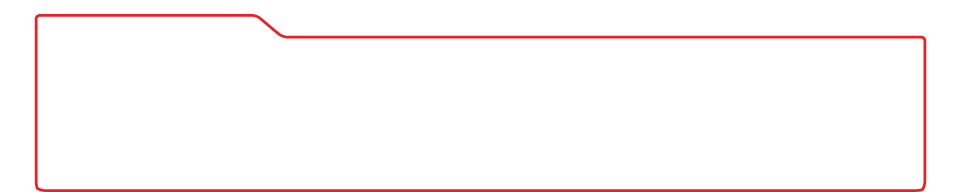
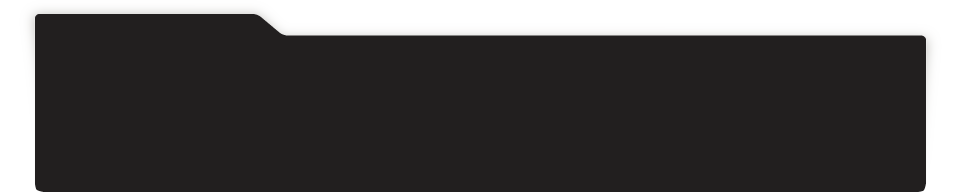
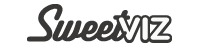
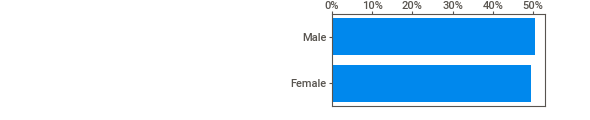
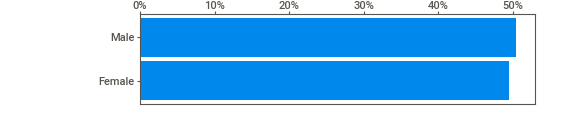
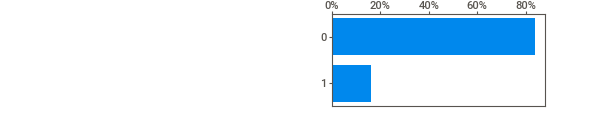
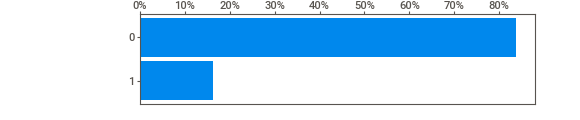
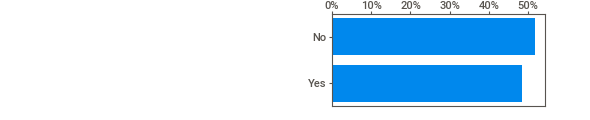
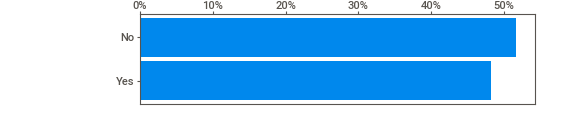
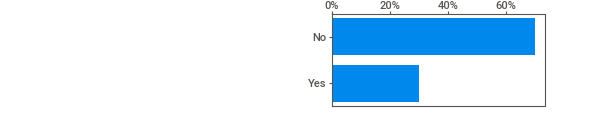
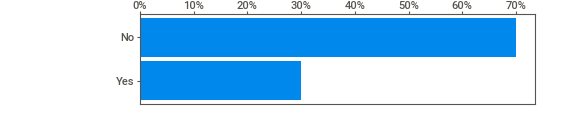
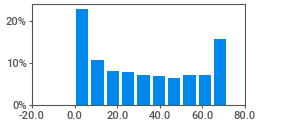
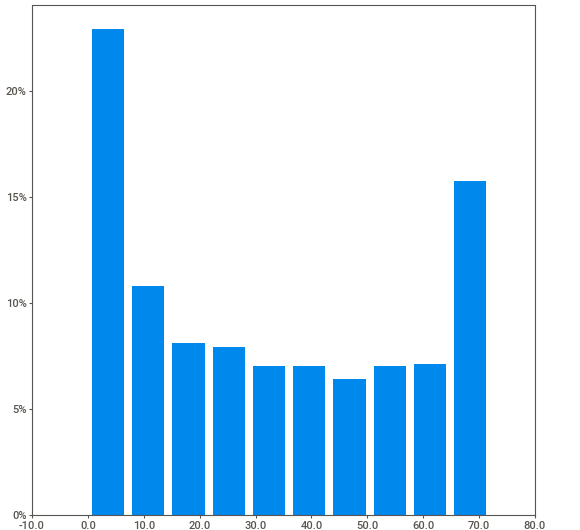
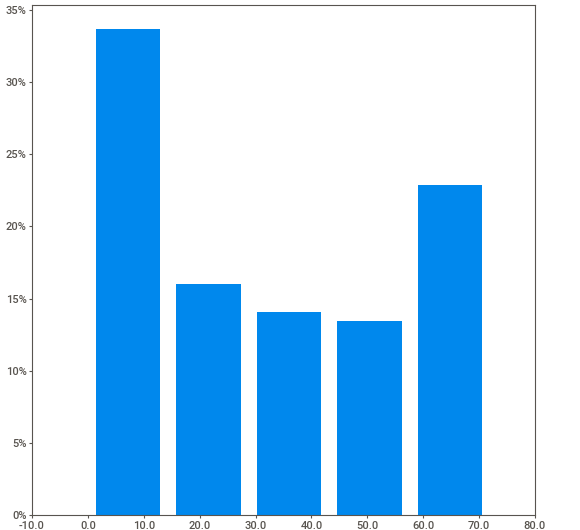
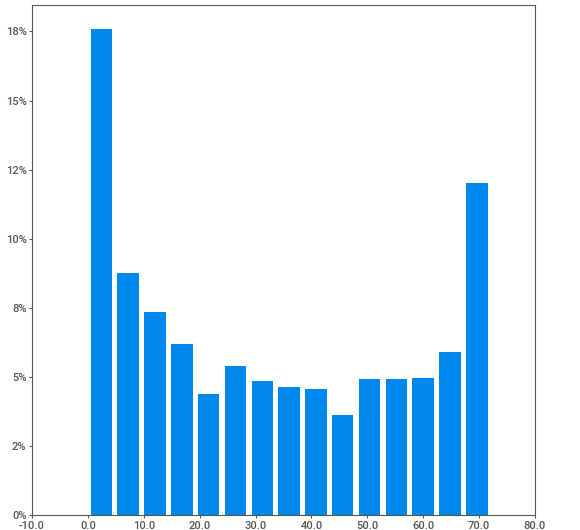
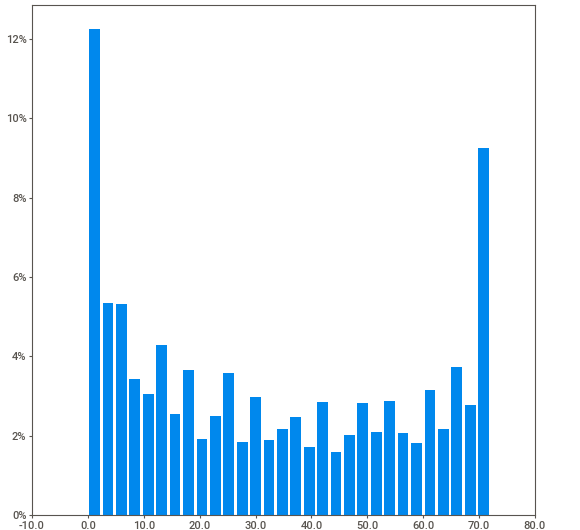
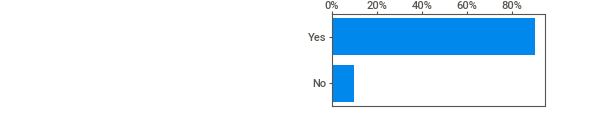
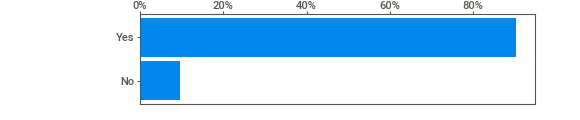
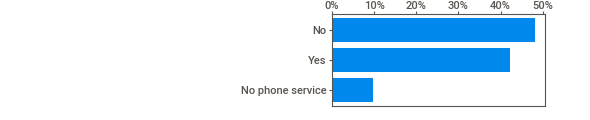
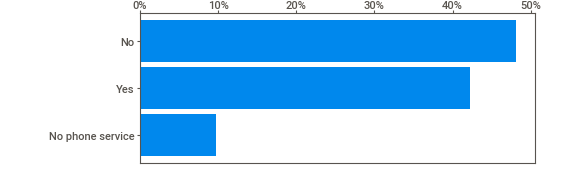
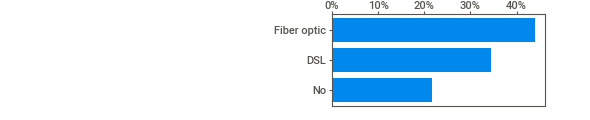
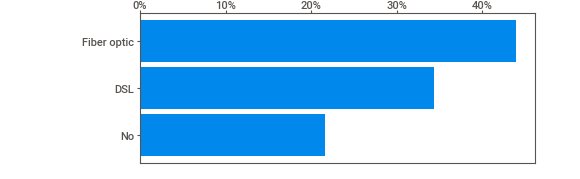
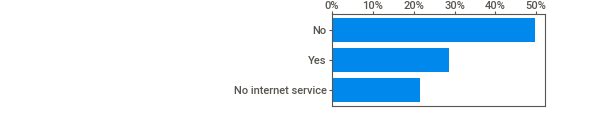
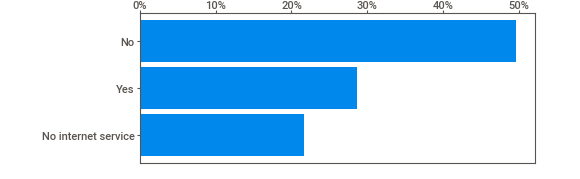
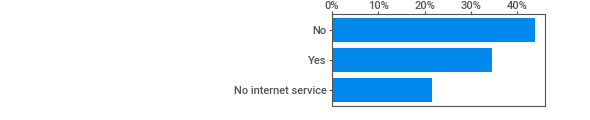
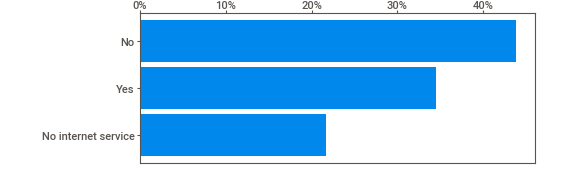
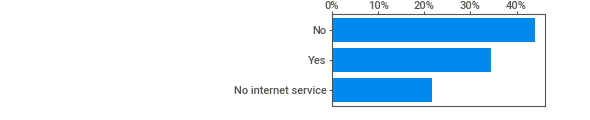
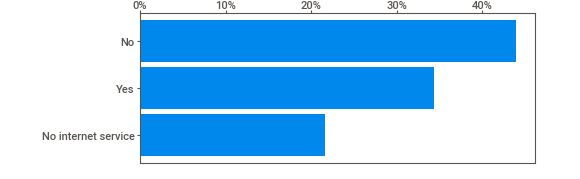
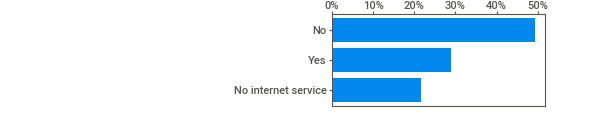
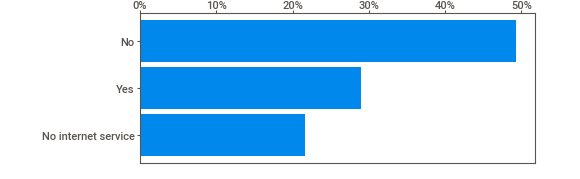
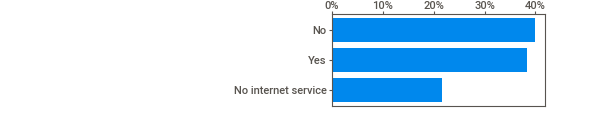
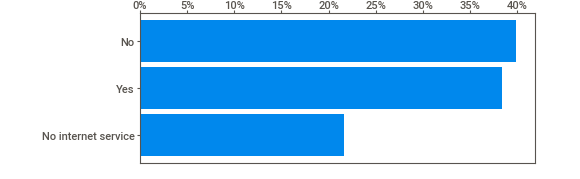
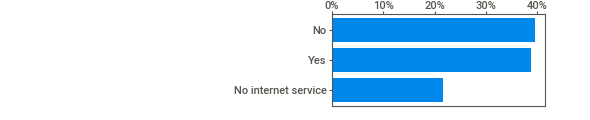
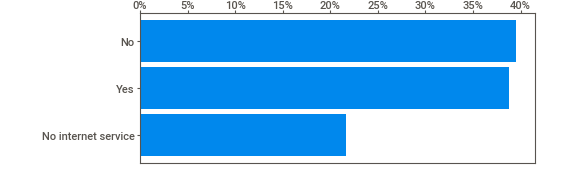
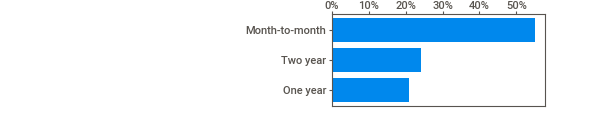
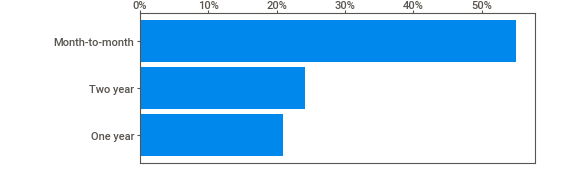
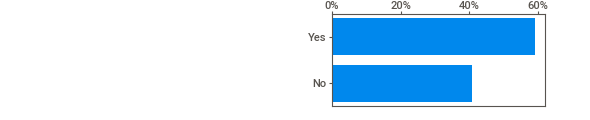
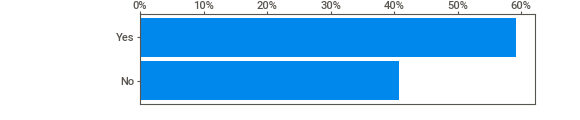
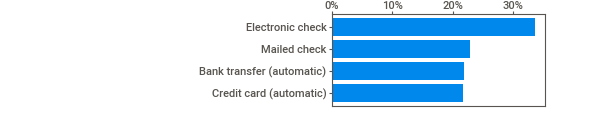
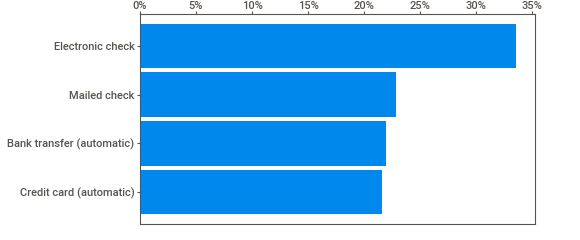
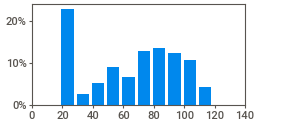
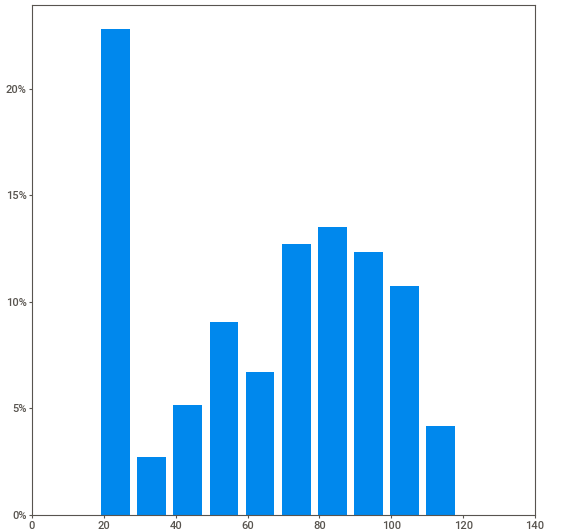
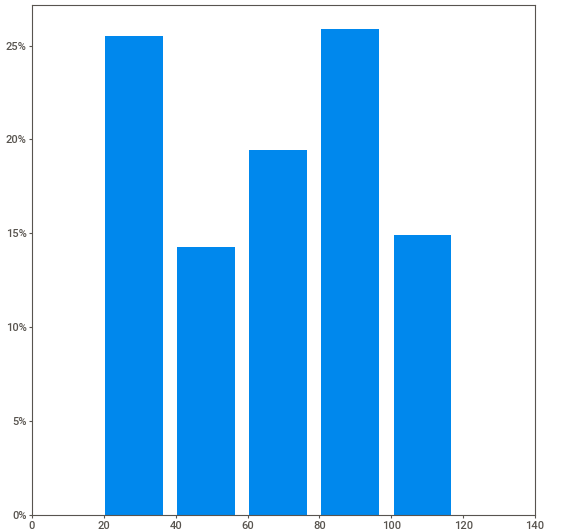
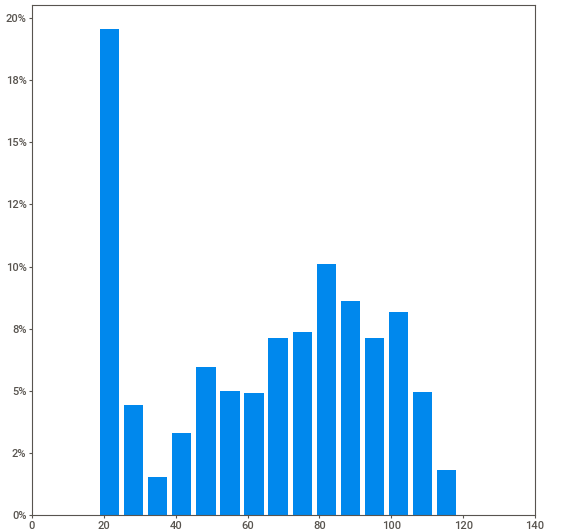
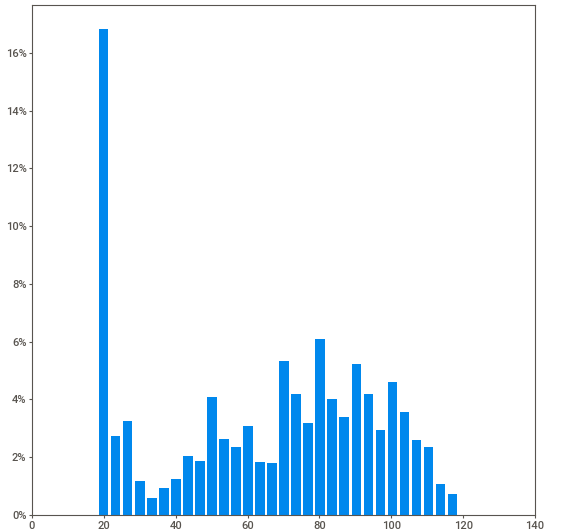
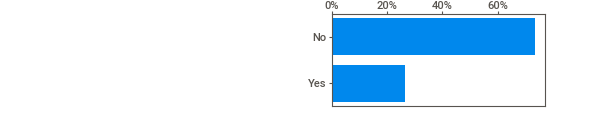
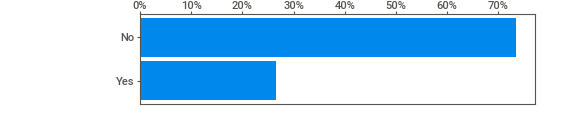
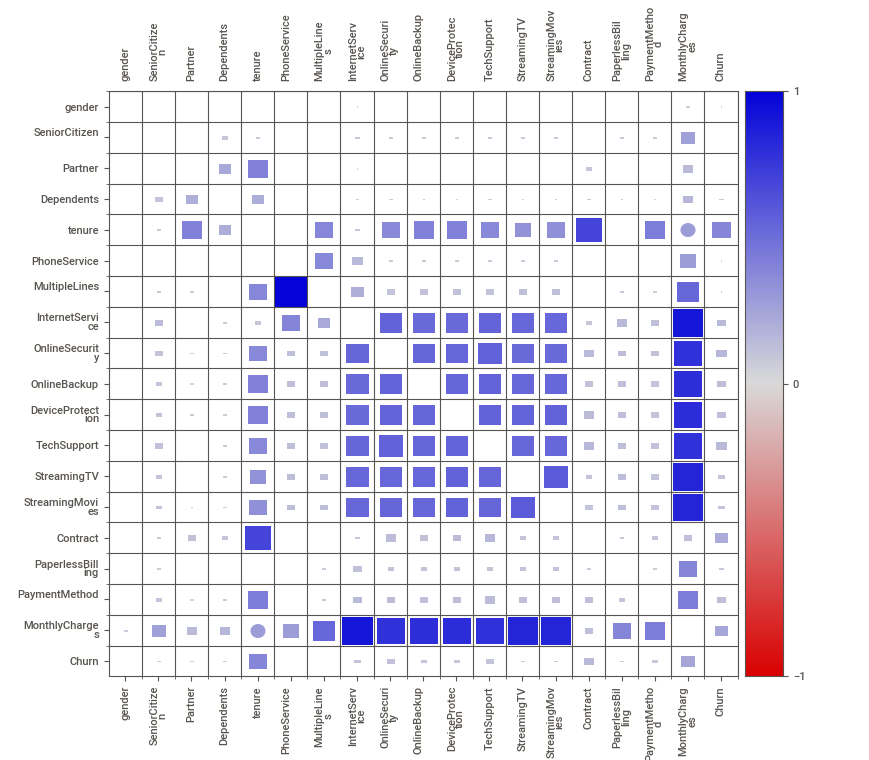
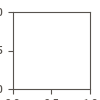

In [40]:
report.show_notebook()

In [2]:
import jinja2
print(jinja2.__version__)

3.1.2


## Using Pandas Profiling

In [41]:
from ydata_profiling import ProfileReport

In [42]:
profile = ProfileReport(data, title="Profiling Report")

In [43]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [45]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Compare and Train and Test set with Sweetviz

In [70]:
# Reconstructing the datasets to include the target variable
train_data_with_target = X_train.copy()
train_data_with_target['Churn_Yes'] = y_train

test_data_with_target = X_test.copy()
test_data_with_target['Churn_Yes'] = y_test

train_data_with_target.head(), test_data_with_target.head()


(      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
 3738              0      35           49.20       1701.65            1   
 3151              0      15           75.10       1151.55            1   
 4860              0      13           40.55        590.35            1   
 3867              0      26           73.50       1905.70            0   
 3810              0       1           44.55         44.55            1   
 
       Partner_Yes  Dependents_Yes  PhoneService_Yes  \
 3738            0               0                 0   
 3151            1               1                 1   
 4860            1               1                 0   
 3867            1               0                 1   
 3810            1               1                 1   
 
       MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
 3738                               1                  0  ...                1   
 3151                               0         

In [71]:
report = sv.compare([train_data_with_target, "Training Data"], [test_data_with_target, "Test Data"], target_feat='Churn_Yes')
report.show_html('Sweetviz_Compare_Report.html')


                                             |      | [  0%]   00:00 -> (? left)

Report Sweetviz_Compare_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



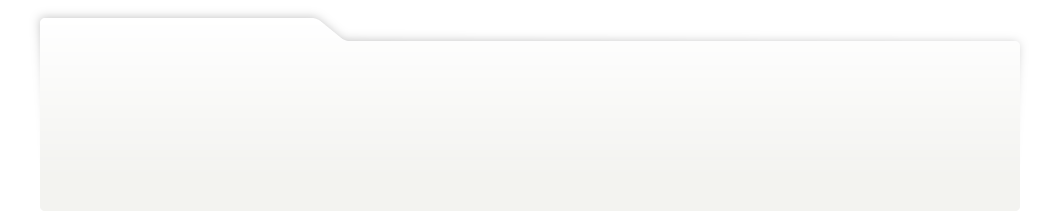
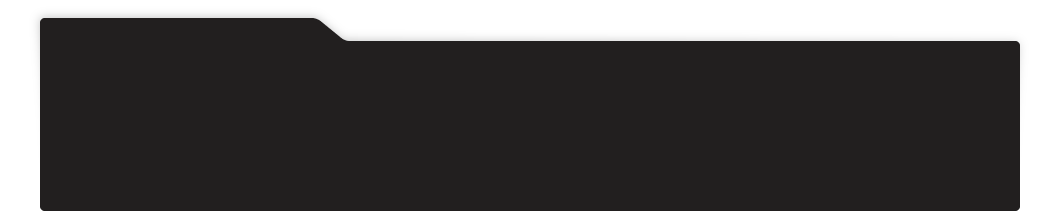
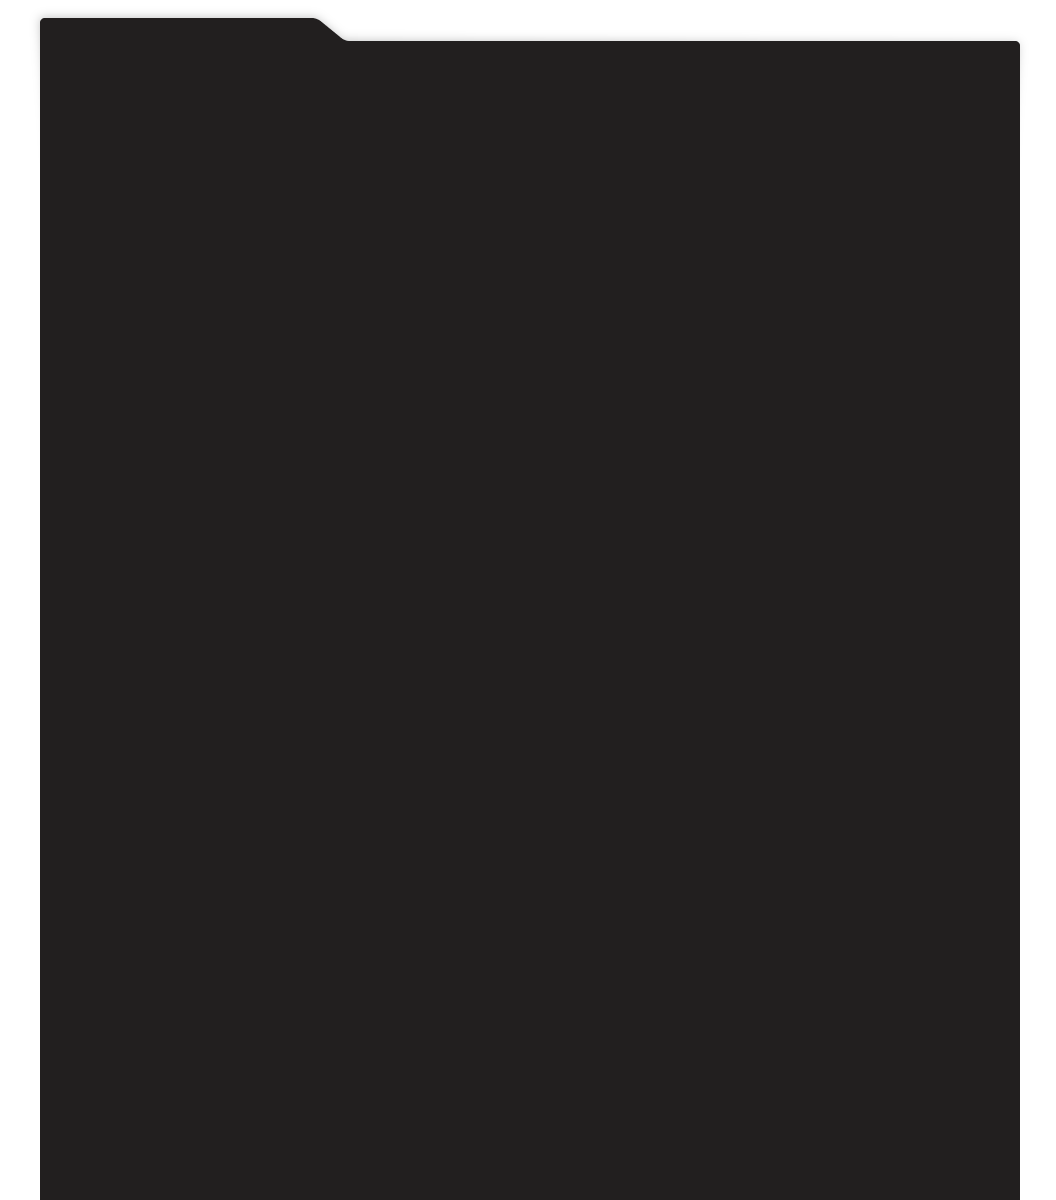
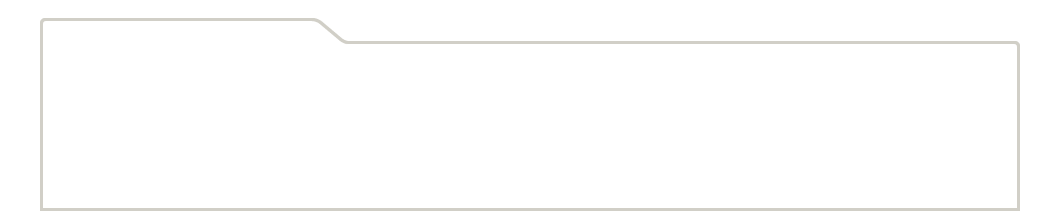
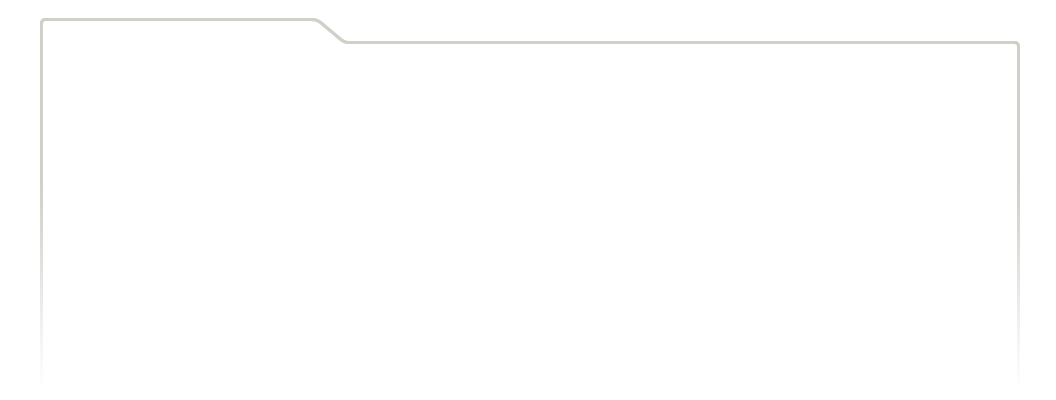
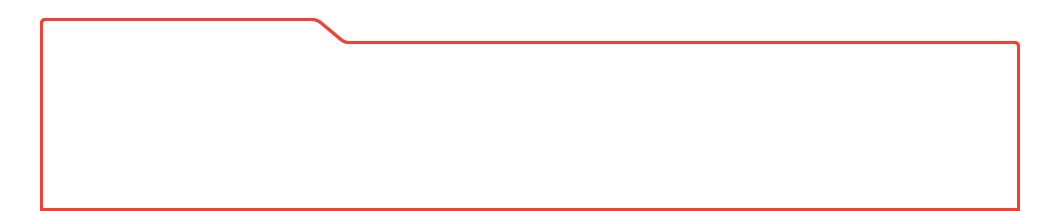
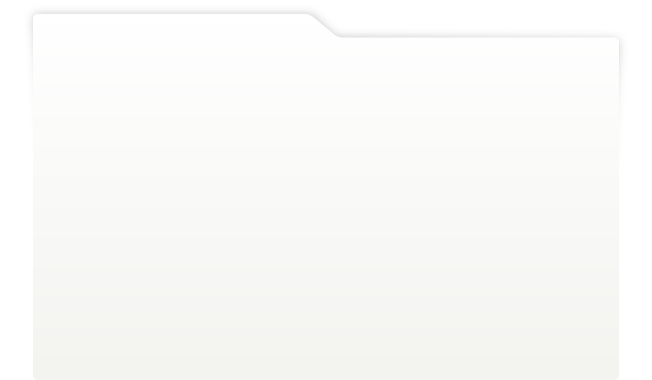
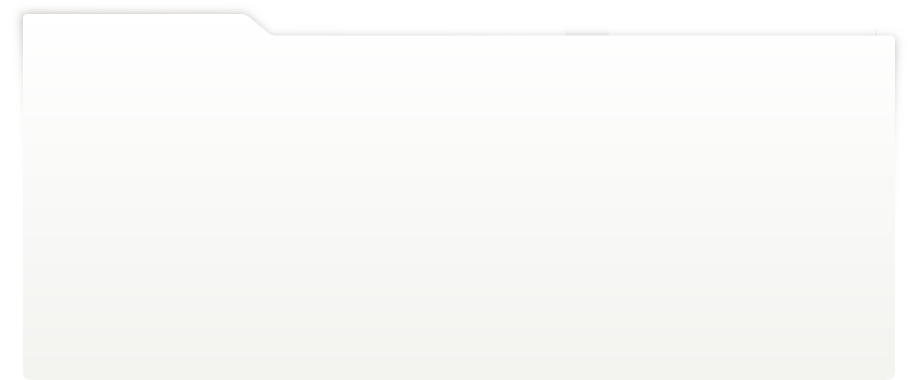
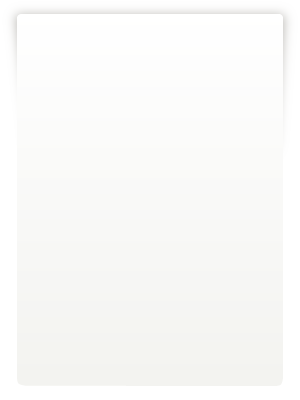
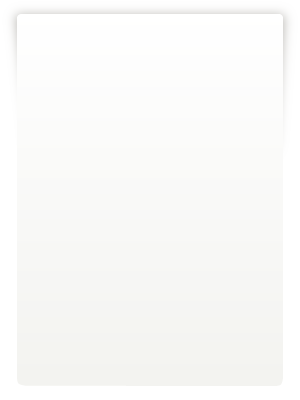
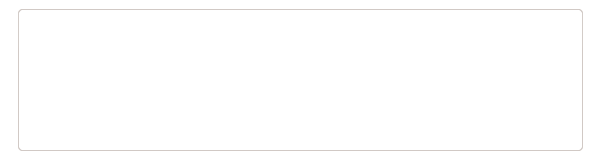
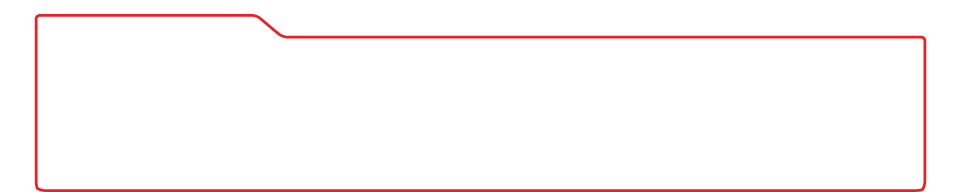
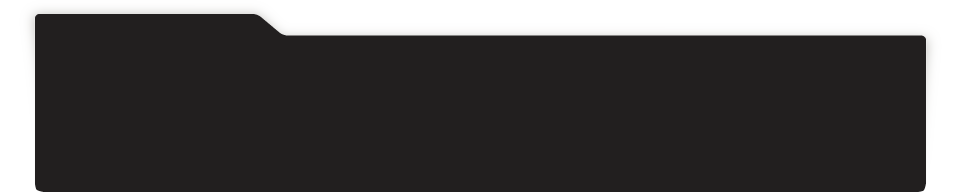
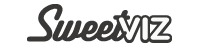
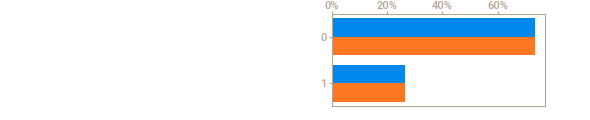
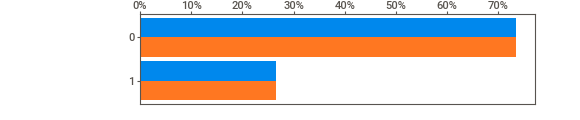
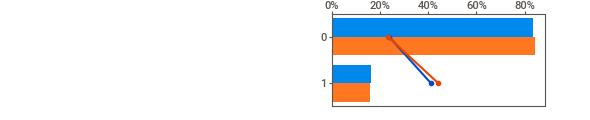
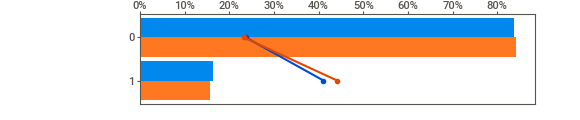
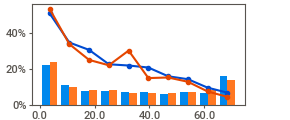
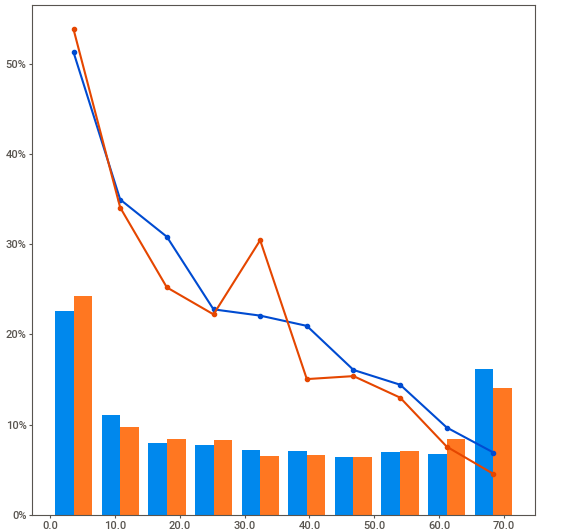
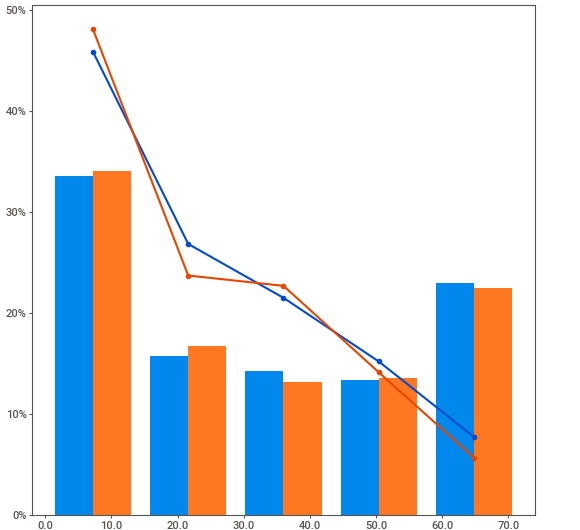
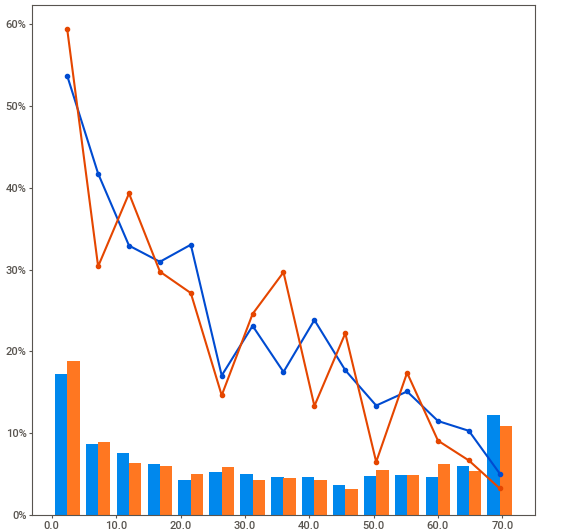
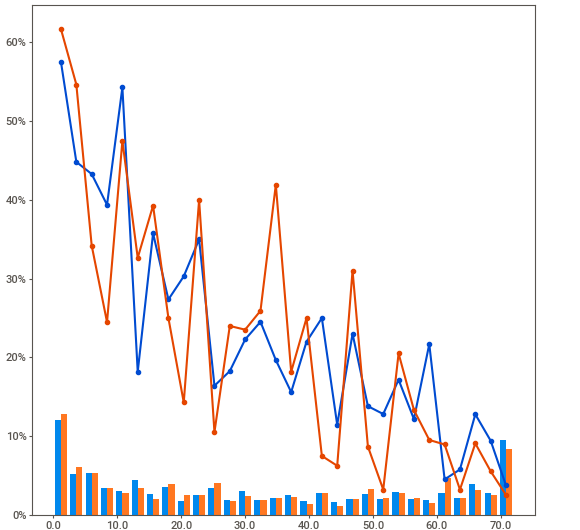
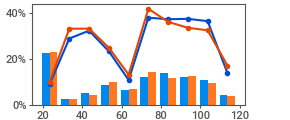
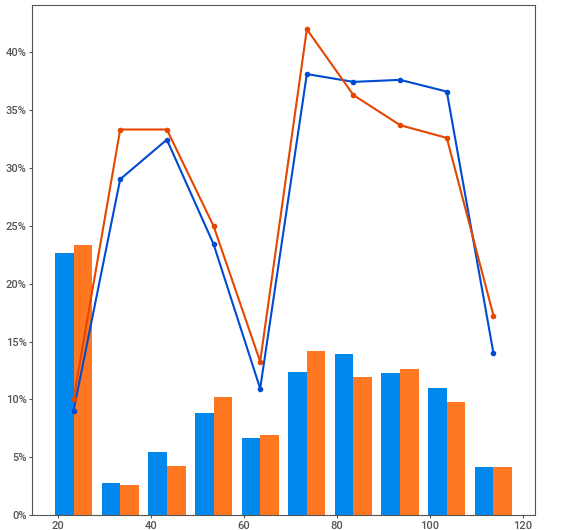
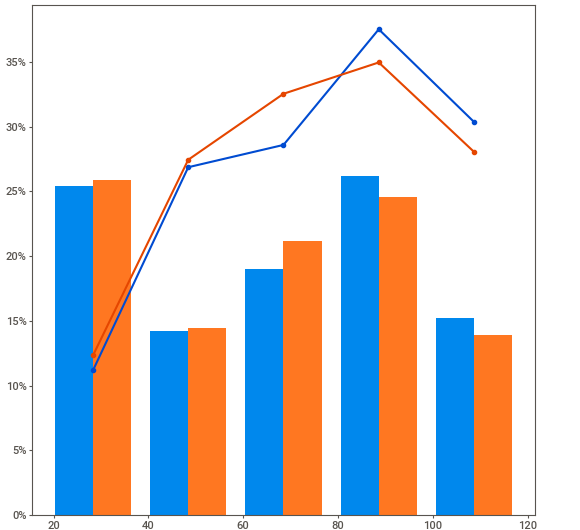
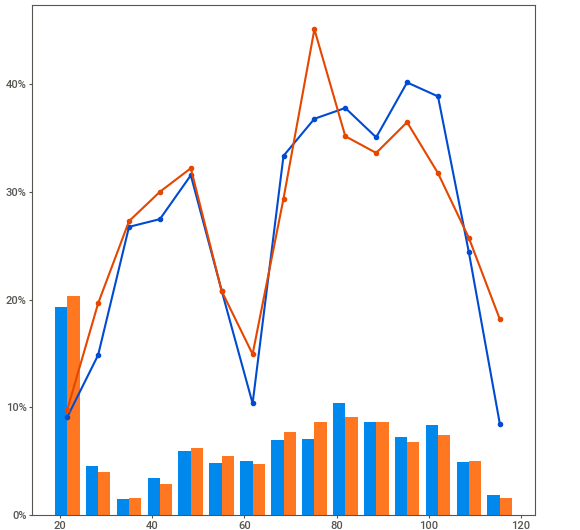
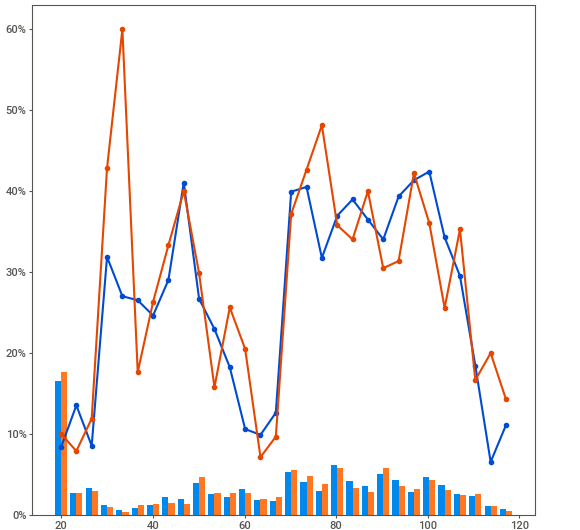
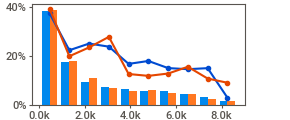
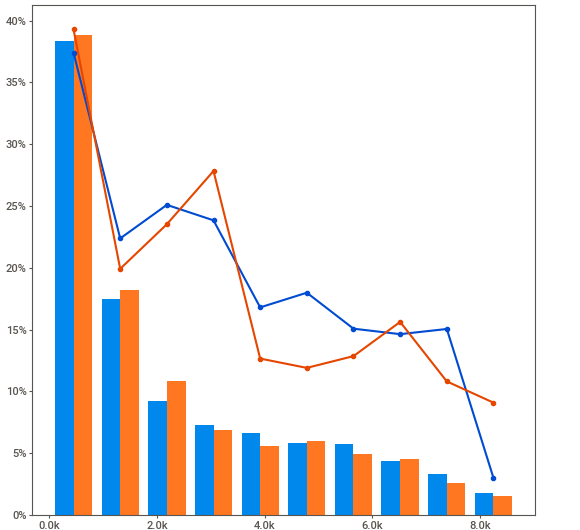
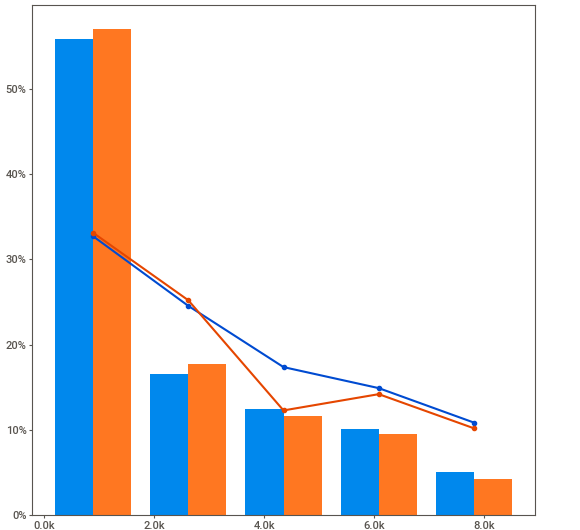
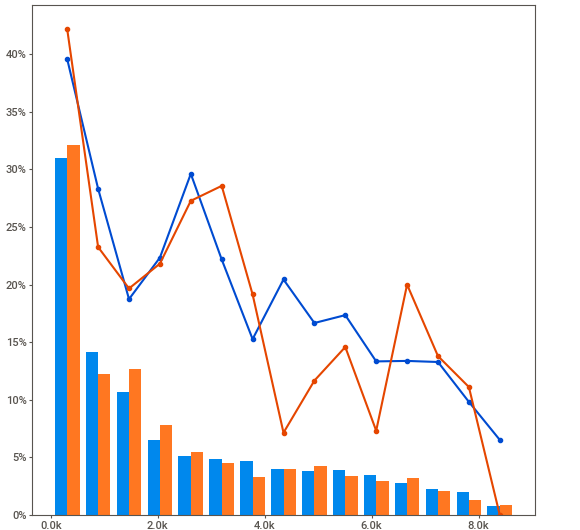
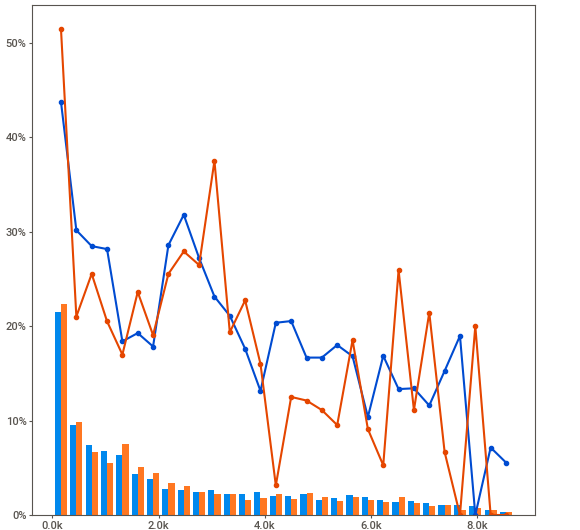
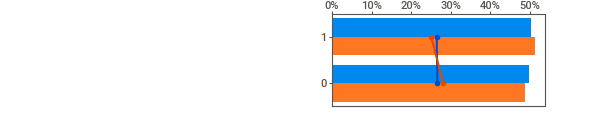
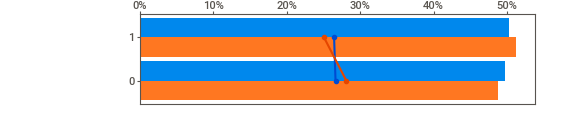
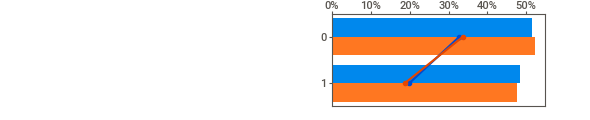
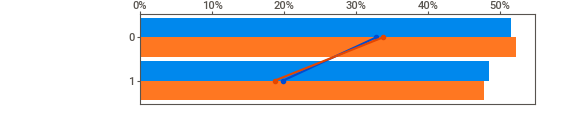
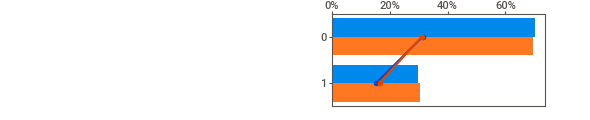
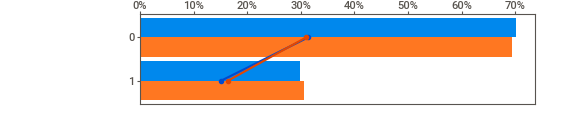
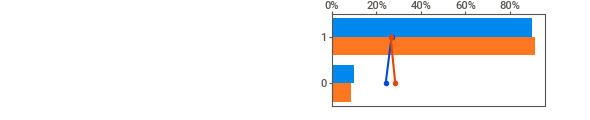
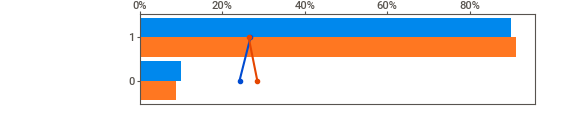
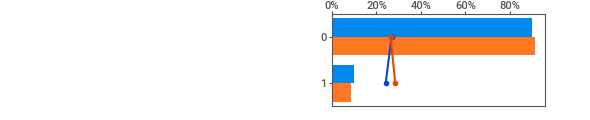
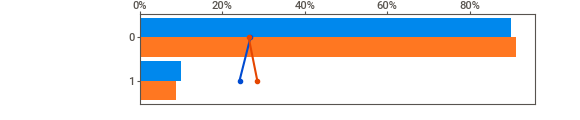
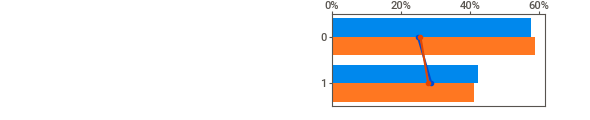
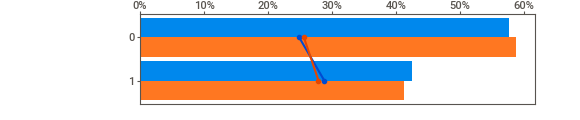
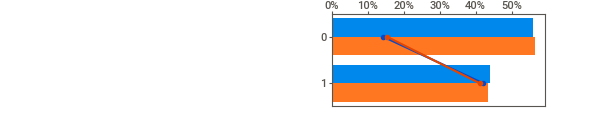
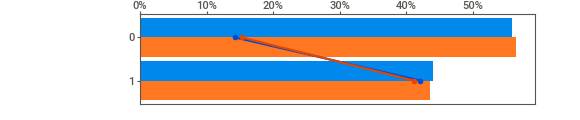
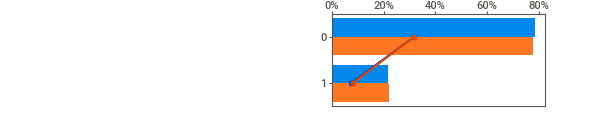
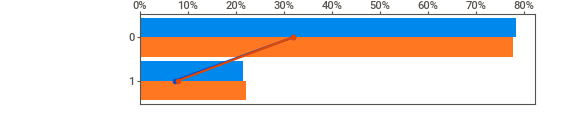
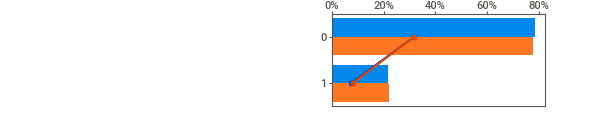
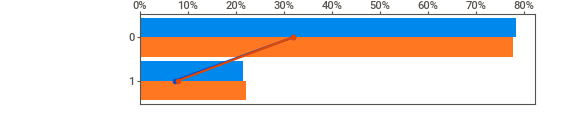
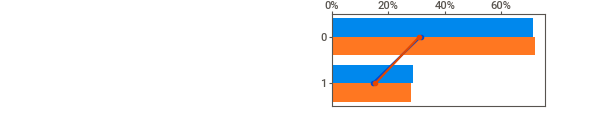
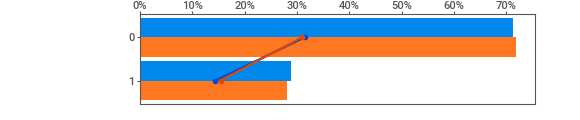
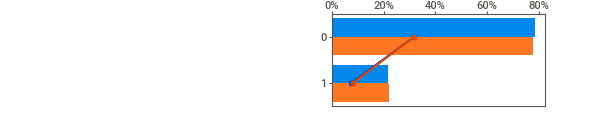
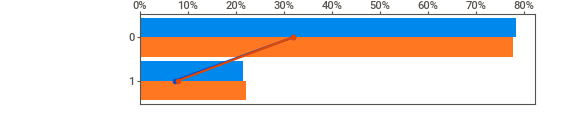
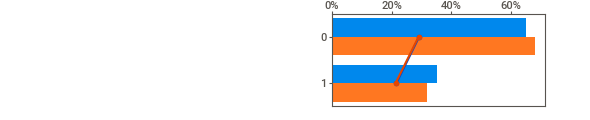
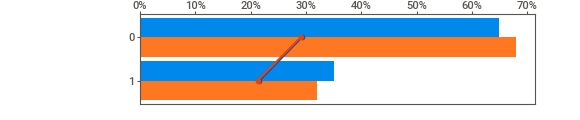
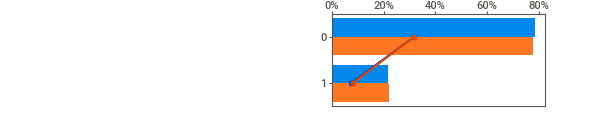
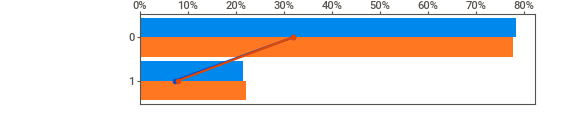
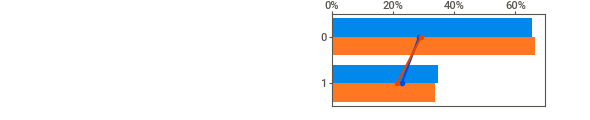
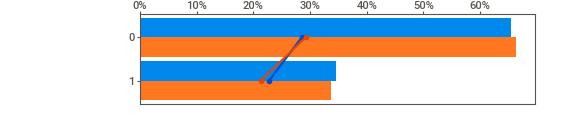
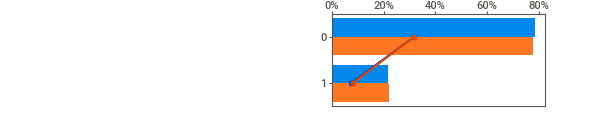
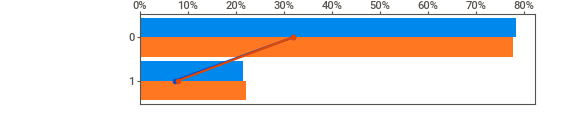
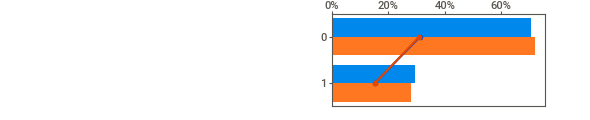
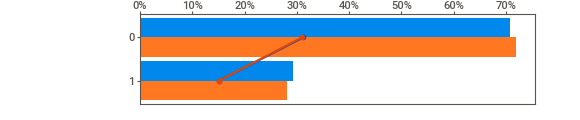
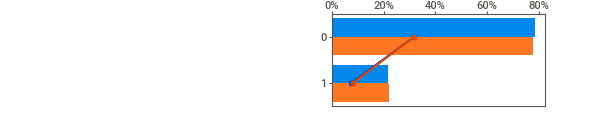
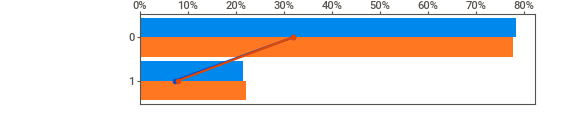
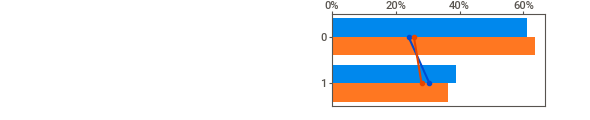
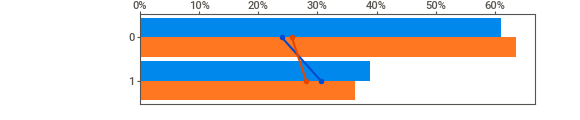
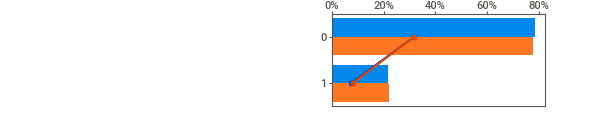
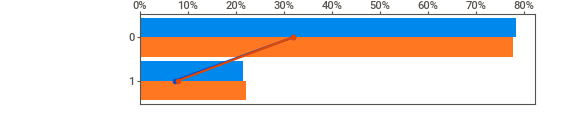
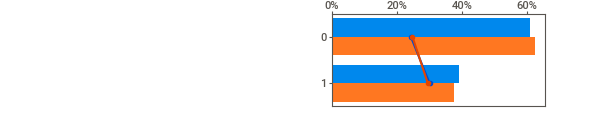
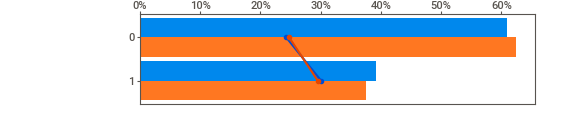
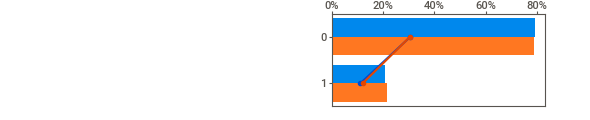
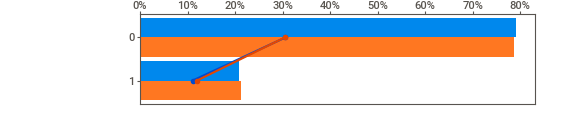
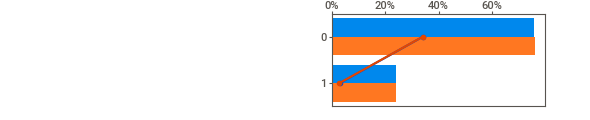
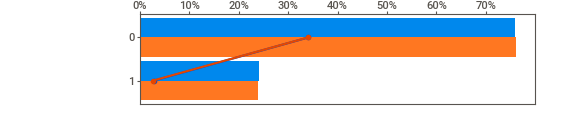
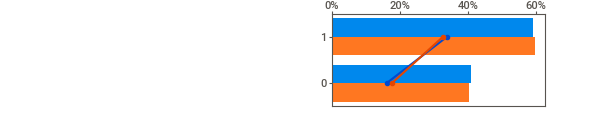
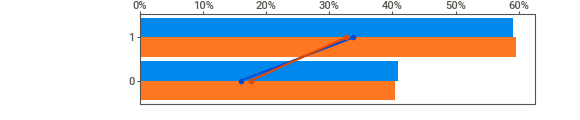
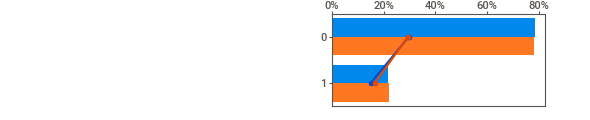
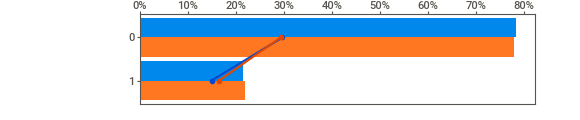
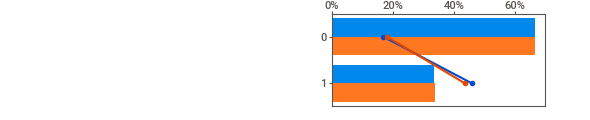
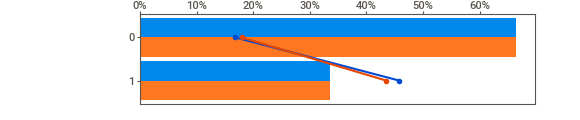
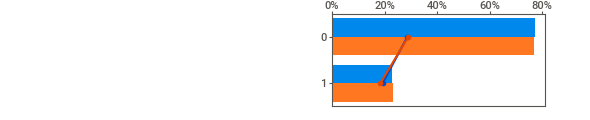
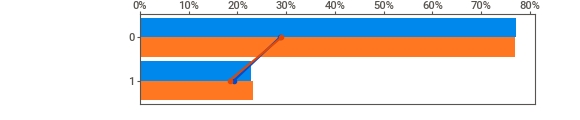
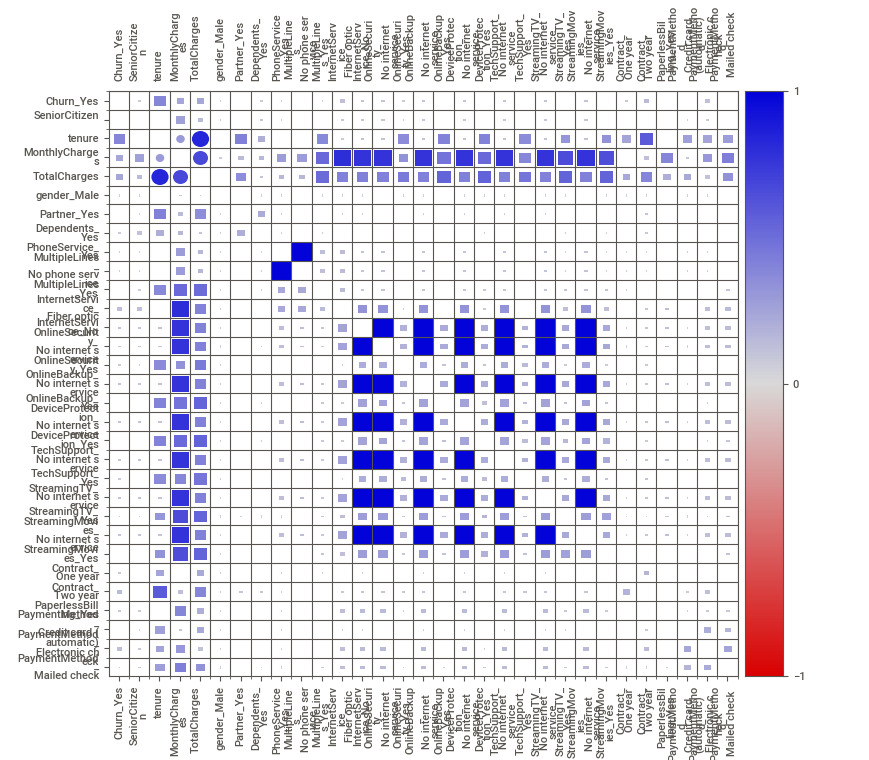
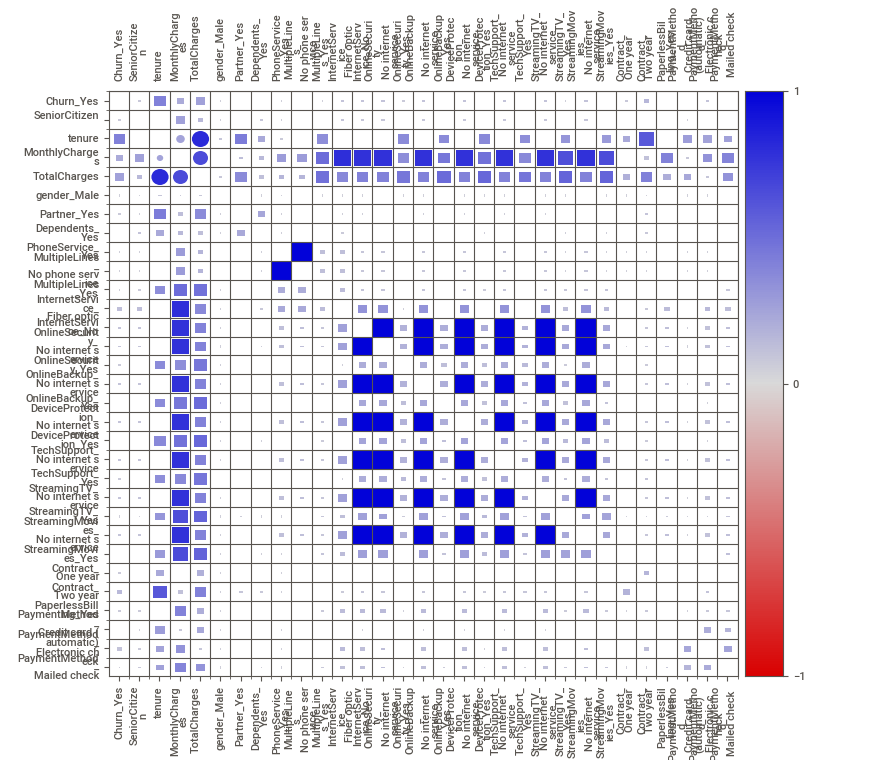

In [72]:
report.show_notebook()

## Conclusion

1. There was no missing data, relatively clean, several categorical variables such as gender, partner and dependent were converted to numerical format using one-hot encoding. Target variable was set to (0 for no and 1 for yes)




2. The distribution of contracts (Month-to-Month, One Year, Two Year) is fairly even across both genders. This indicate a preference for shorter-term commitments among the customer base.

**Recommendation**

1. Customer retention
2. Evaluate pricing: Higher price seem to churn factor

